<a href="https://colab.research.google.com/github/Abhishek-622/Kidney_Stone_Detection/blob/main/Kidney_Stone_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone

Dataset URL: https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone
License(s): copyright-authors
100% 1.52G/1.52G [00:46<00:00, 38.5MB/s]
100% 1.52G/1.52G [00:46<00:00, 35.1MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/ct-kidney-dataset-normal-cyst-tumor-and-stone.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# *Libraries*

In [4]:
from keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns



# *Spliting Folder for Train, Test and Validation*

In [5]:
pip install split-folders


In [6]:
import splitfolders

input_path = "/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"
splitfolders.ratio(
    input_path,
    output="/content/dataset",
    seed=7,
    ratio=(0.90, 0.05, 0.05)
)


Copying files: 12446 files [00:06, 1826.05 files/s]


In [7]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_dataset = train_datagen.flow_from_directory(
    '/content/dataset/train',
    target_size=(200, 200),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=100,
)

test_dataset = test_datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=(200, 200),
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=100,
    shuffle=False
)

valid_dataset = valid_datagen.flow_from_directory(
    '/content/dataset/val',
    target_size=(200, 200),
    class_mode='categorical',
    batch_size=100,
    color_mode='grayscale',
)

Found 11200 images belonging to 4 classes.
Found 626 images belonging to 4 classes.
Found 620 images belonging to 4 classes.


# *Model*

In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=train_dataset.image_shape))
model.add(MaxPool2D(2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Flatten())

model.add(Dense(512, activation='relu'))


model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

In [9]:
import keras
METRICS = [
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=METRICS)

# *Fitting the Model*

In [10]:
Info = model.fit(
                 train_dataset,
                 validation_data=valid_dataset,
                 epochs=5,

                 )

Epoch 1/5
112/112 [==============================] - 69s 513ms/step - loss: 1.1252 - accuracy: 0.5497 - precision: 0.6633 - recall: 0.3557 - val_loss: 1.0904 - val_accuracy: 0.5903 - val_precision: 0.6218 - val_recall: 0.5516
Epoch 2/5
112/112 [==============================] - 46s 413ms/step - loss: 0.6525 - accuracy: 0.7441 - precision: 0.7914 - recall: 0.6881 - val_loss: 0.3874 - val_accuracy: 0.8677 - val_precision: 0.9091 - val_recall: 0.8065
Epoch 3/5
112/112 [==============================] - 47s 416ms/step - loss: 0.2178 - accuracy: 0.9279 - precision: 0.9354 - recall: 0.9202 - val_loss: 0.0251 - val_accuracy: 0.9984 - val_precision: 0.9984 - val_recall: 0.9984
Epoch 4/5
112/112 [==============================] - 47s 419ms/step - loss: 0.0897 - accuracy: 0.9733 - precision: 0.9744 - recall: 0.9723 - val_loss: 0.0051 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/5
112/112 [==============================] - 53s 471ms/step - loss: 0.0611 - accuracy: 0

# *Graphs*

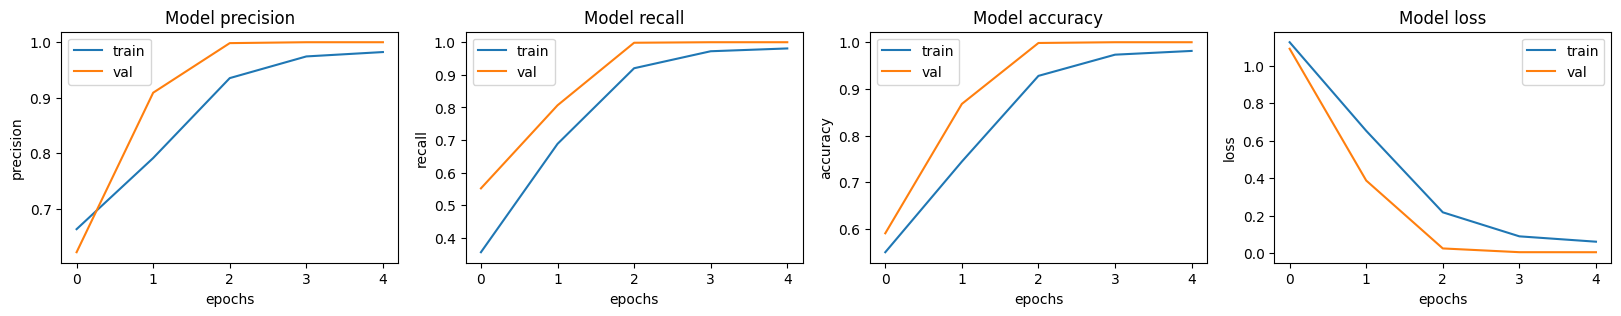

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(Info.history[met])
    ax[i].plot(Info.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [12]:
predictions = model.predict(test_dataset)

7/7 [==============================] - 4s 515ms/step


In [13]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
   diseases_labels.append(key)

In [14]:
def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(20,20))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
  plt.show()

# ***Prediction***

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1_score: 1.0


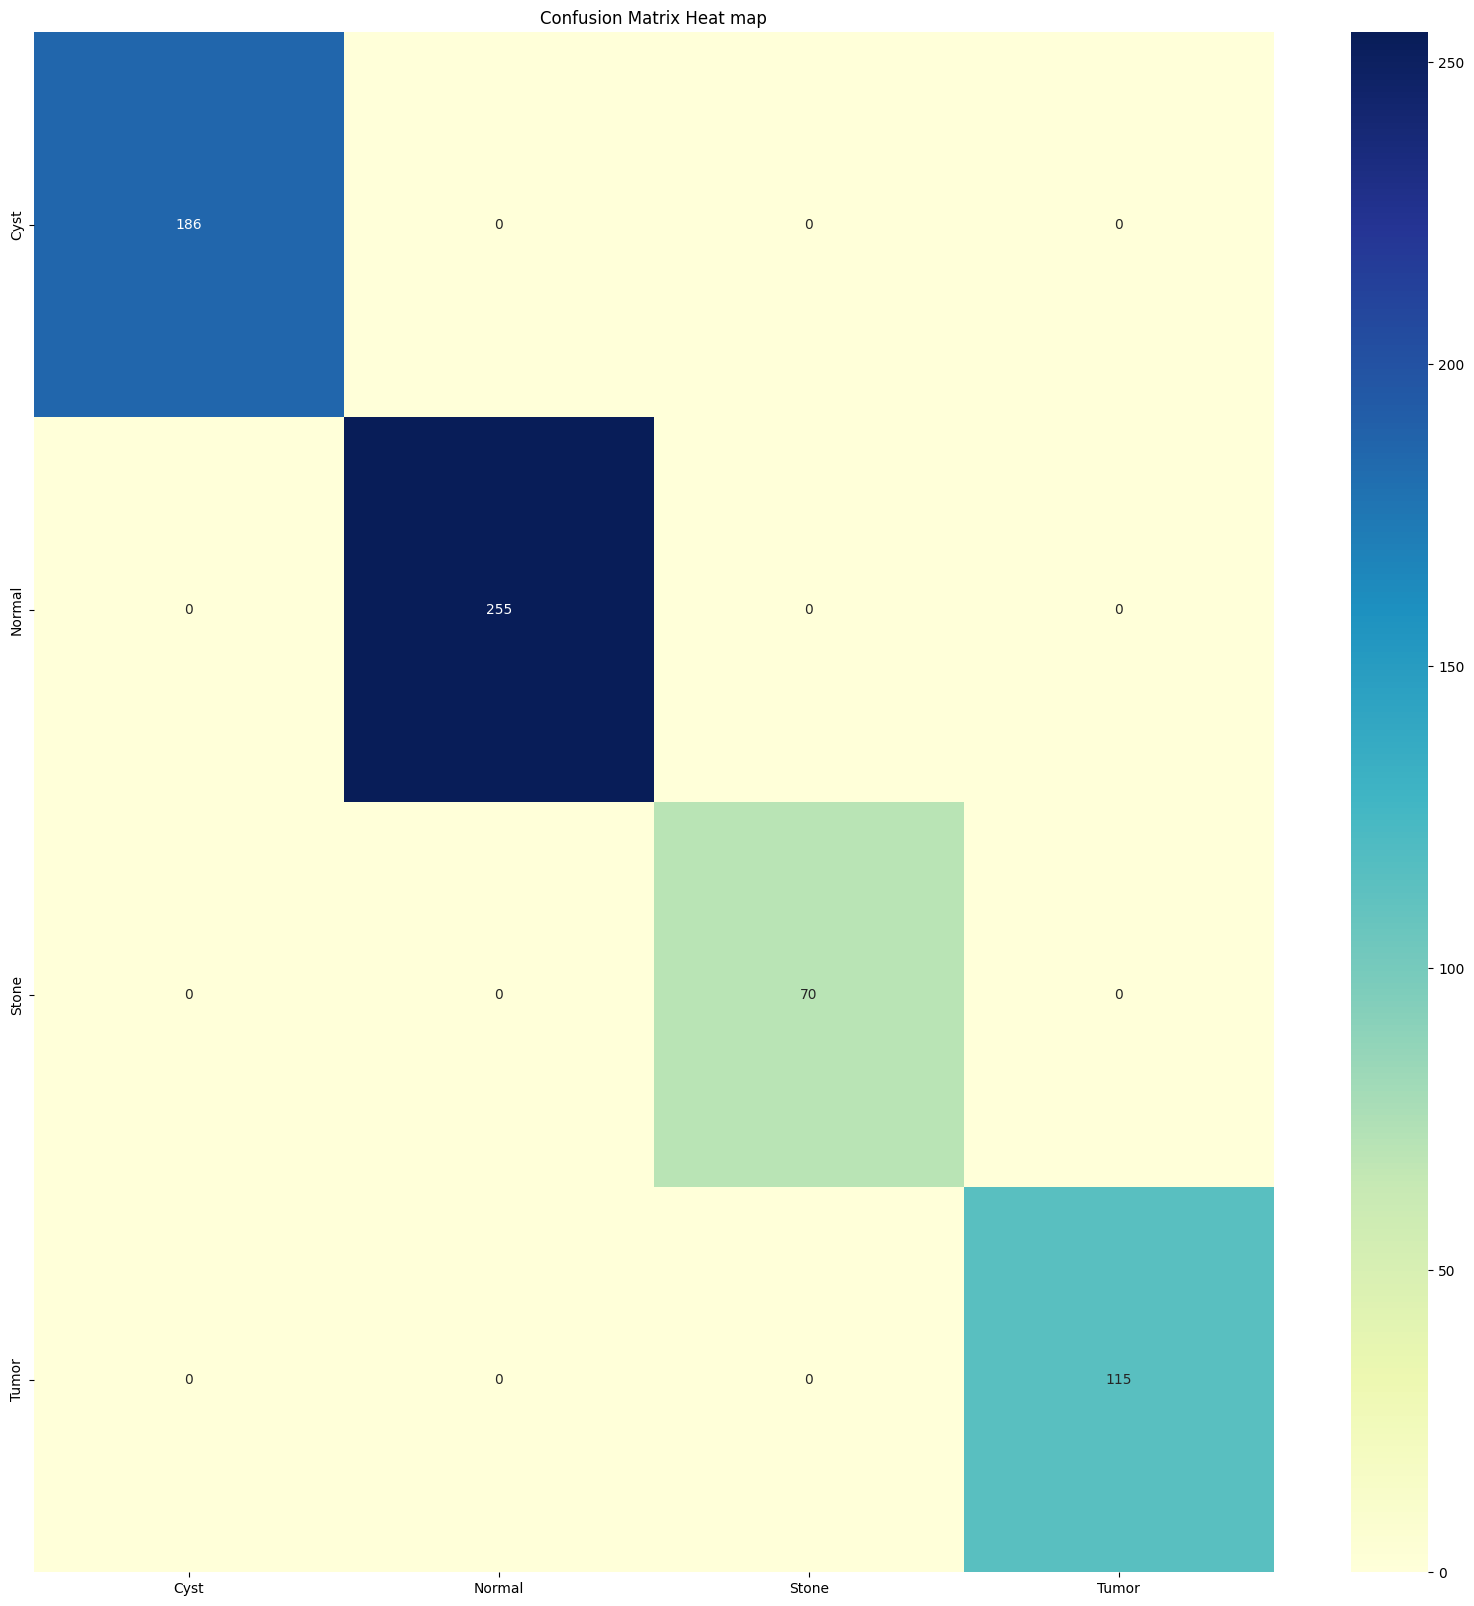

In [15]:
evaluate(test_dataset.classes,predictions)